In this workspace, you'll scrape the novel Moby Dick from the website [Project Gutenberg](https://www.gutenberg.org/) (which contains a large corpus of books) using the Python `requests` package. You'll extract words from this web data using `BeautifulSoup` before analyzing the distribution of words using the Natural Language ToolKit (`nltk`) and `Counter`.

The Data Science pipeline you'll build in this workspace can be used to visualize the word frequency distributions of any novel you can find on Project Gutenberg.

# Request Moby Dick
The first step will be to request the Moby Dick HTML file using requests and encoding it to utf-8. Here is the URL to scrape from: https://s3.amazonaws.com/assets.datacamp.com/production/project_147/datasets/2701-h.htm

In [34]:
# Import and download packages
import requests
from bs4 import BeautifulSoup
import nltk
from collections import Counter
nltk.download('stopwords')

# Getting the Moby Dick HTML 
r = requests.get('https://s3.amazonaws.com/assets.datacamp.com/production/project_147/datasets/2701-h.htm')

# Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

# Extracting the HTML from the request object
html = r.text

# Printing the first 2000 characters in html
html[0:2000]


[nltk_data] Downloading package stopwords to /home/repl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'<?xml version="1.0" encoding="utf-8"?>\r\n\r\n<!DOCTYPE html\r\n   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"\r\n   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >\r\n\r\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\r\n  <head>\r\n    <title>\r\n      Moby Dick; Or the Whale, by Herman Melville\r\n    </title>\r\n    <style type="text/css" xml:space="preserve">\r\n\r\n    body { background:#faebd0; color:black; margin-left:15%; margin-right:15%; text-align:justify }\r\n    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }\r\n    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }\r\n    hr  { width: 50%; text-align: center;}\r\n    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }\r\n    blockquote {font-size: 100%; margin-left: 0%; margin-right: 0%;}\r\n    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-se

# Get the text from the HTML
`Beautiful Soup` is a Python library used for web scraping purposes to extract data from HTML and XML documents. It creates parse trees from page source code that can be used to extract data from web pages.

In [35]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, 'html.parser')

# Getting the text out of the soup
text = soup.get_text()

# Printing out text between characters 32000 and 34000
text[32000:34000]

'ent me\r\n      from deliberately stepping into the street, and methodically knocking\r\n      people’s hats off—then, I account it high time to get to sea as soon\r\n      as I can. This is my substitute for pistol and ball. With a philosophical\r\n      flourish Cato throws himself upon his sword; I quietly take to the ship.\r\n      There is nothing surprising in this. If they but knew it, almost all men\r\n      in their degree, some time or other, cherish very nearly the same feelings\r\n      towards the ocean with me.\r\n    \n\r\n      There now is your insular city of the Manhattoes, belted round by wharves\r\n      as Indian isles by coral reefs—commerce surrounds it with her surf.\r\n      Right and left, the streets take you waterward. Its extreme downtown is\r\n      the battery, where that noble mole is washed by waves, and cooled by\r\n      breezes, which a few hours previous were out of sight of land. Look at the\r\n      crowds of water-gazers there.\r\n    \n\r\n   

# Extract the words
A `tokenizer` is a tool used in natural language processing (NLP) that splits text into smaller units, called tokens. These tokens can be words, subwords, or characters, depending on the type of tokenizer used. Tokenization is an essential first step in most NLP tasks like text classification, machine translation, and sentiment analysis

In [36]:
# Creating a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# Tokenizing the text
tokens = tokenizer.tokenize(text)

# Printing out the first 8 words / tokens 
tokens[:8]

['Moby', 'Dick', 'Or', 'the', 'Whale', 'by', 'Herman', 'Melville']

#  Remove stop words in Moby Dick
`Stop words` are common words (such as "the", "is", "in", "at", "on", etc.) that are often filtered out during text preprocessing because they don’t carry much meaningful information in many natural language processing (NLP) tasks. These words tend to be frequent in texts but don't contribute to the context or meaning in tasks like text classification, sentiment analysis, or topic modeling.

In [37]:
# Getting the English stop words from nltk
sw = nltk.corpus.stopwords.words('english')

# A new list to hold Moby Dick with No Stop words
words_no_stop = []

# Appending to words_ns all words that are in words but not in sw
for word in tokens:
    if not word in sw:
        words_no_stop.append(word.lower())

# Printing the first 5 words_ns to check that stop words are gone
words_no_stop[:8]

['moby', 'dick', 'or', 'whale', 'herman', 'melville', 'the', 'project']

# Visulisation of Result

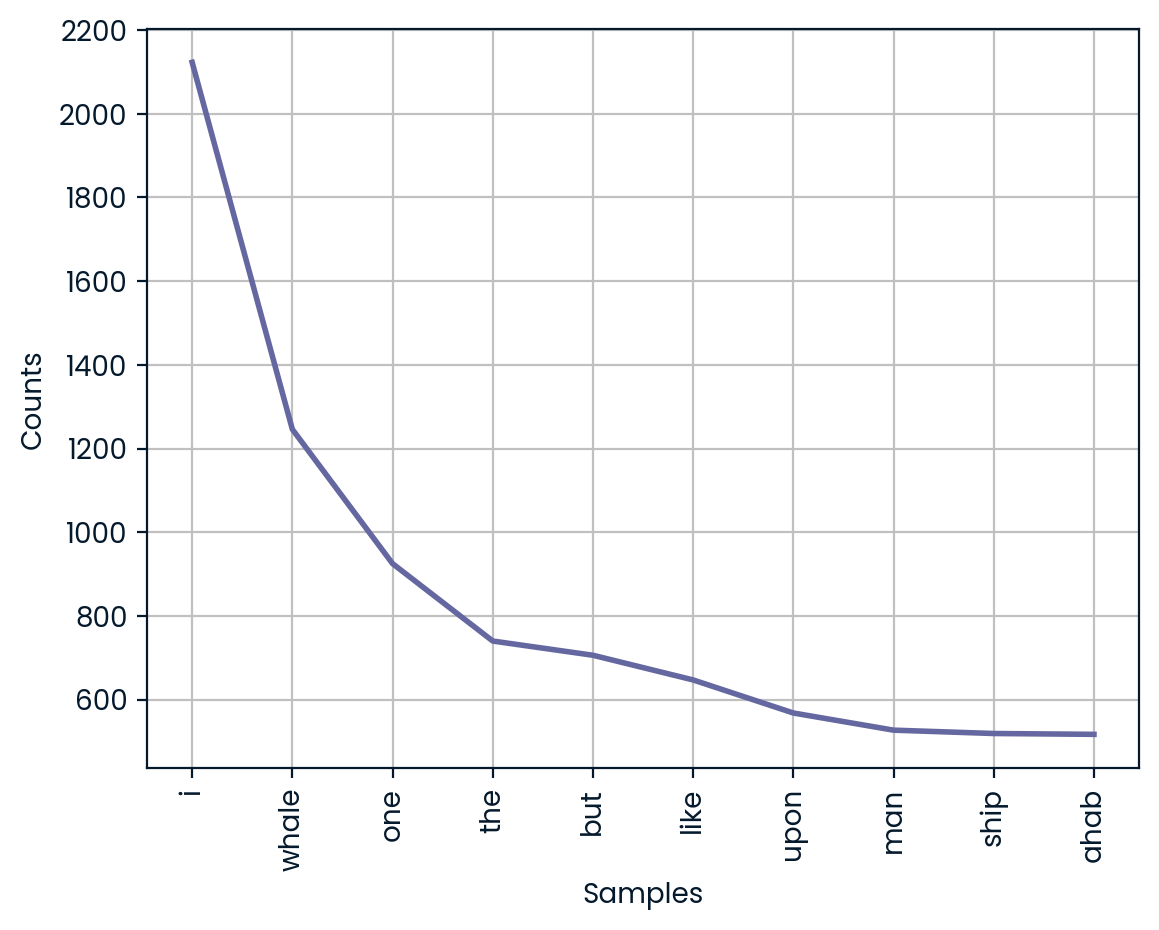

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [38]:
# This command display figures inline
%matplotlib inline

# Creating the word frequency distribution
freqdist = nltk.FreqDist(words_no_stop)

# Plotting the word frequency distribution
freqdist.plot(10)

# Top 10 Words

In [39]:
word_counter = Counter(words_no_stop)

# Find the ten most common words
top_ten = word_counter.most_common(10)

# Print the result
print("Top ten most common words:", top_ten)

Top ten most common words: [('i', 2123), ('whale', 1246), ('one', 925), ('the', 740), ('but', 706), ('like', 647), ('upon', 568), ('man', 527), ('ship', 519), ('ahab', 517)]
